In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Print the list of available dataset names
dataset_names = sns.get_dataset_names()
print(dataset_names)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [2]:
data=sns.load_dataset("planets")
data.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [3]:
#speed=distance/time
data["orbital_speed"]=data["distance"]/data["orbital_period"]
data=data.sort_index(axis=1,ascending=True)

In [4]:
data.isnull().sum()

distance          227
mass              522
method              0
number              0
orbital_period     43
orbital_speed     259
year                0
dtype: int64

In [5]:
data=data.rename(columns={"number":"number_of_moons","year":"discovery_year","method":"planet_finding_method","distance":"orbit_distance","mass":"body_mass","orbital_period":"orbiting_period","orbital_speed":"orbiting_speed"})
data.sort_index(ascending=True,axis=1)
data.columns

Index(['orbit_distance', 'body_mass', 'planet_finding_method',
       'number_of_moons', 'orbiting_period', 'orbiting_speed',
       'discovery_year'],
      dtype='object')

In [6]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [7]:
for i in data.select_dtypes(include="number"):
    data[i]=impute.fit_transform(data[[i]])


In [8]:
data.isnull().sum()


orbit_distance           0
body_mass                0
planet_finding_method    0
number_of_moons          0
orbiting_period          0
orbiting_speed           0
discovery_year           0
dtype: int64

In [9]:
data["planet_finding_method"].value_counts()

planet_finding_method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

In [10]:
method=[]
method=data["planet_finding_method"]
data=data.drop(["planet_finding_method"],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   orbit_distance   1035 non-null   float64
 1   body_mass        1035 non-null   float64
 2   number_of_moons  1035 non-null   float64
 3   orbiting_period  1035 non-null   float64
 4   orbiting_speed   1035 non-null   float64
 5   discovery_year   1035 non-null   float64
dtypes: float64(6)
memory usage: 48.6 KB


In [11]:
method=pd.get_dummies(method,drop_first=True)
data=pd.concat([method,data],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Eclipse Timing Variations      1035 non-null   bool   
 1   Imaging                        1035 non-null   bool   
 2   Microlensing                   1035 non-null   bool   
 3   Orbital Brightness Modulation  1035 non-null   bool   
 4   Pulsar Timing                  1035 non-null   bool   
 5   Pulsation Timing Variations    1035 non-null   bool   
 6   Radial Velocity                1035 non-null   bool   
 7   Transit                        1035 non-null   bool   
 8   Transit Timing Variations      1035 non-null   bool   
 9   orbit_distance                 1035 non-null   float64
 10  body_mass                      1035 non-null   float64
 11  number_of_moons                1035 non-null   float64
 12  orbiting_period                1035 non-null   f

In [12]:
data.isnull().sum()

Eclipse Timing Variations        0
Imaging                          0
Microlensing                     0
Orbital Brightness Modulation    0
Pulsar Timing                    0
Pulsation Timing Variations      0
Radial Velocity                  0
Transit                          0
Transit Timing Variations        0
orbit_distance                   0
body_mass                        0
number_of_moons                  0
orbiting_period                  0
orbiting_speed                   0
discovery_year                   0
dtype: int64

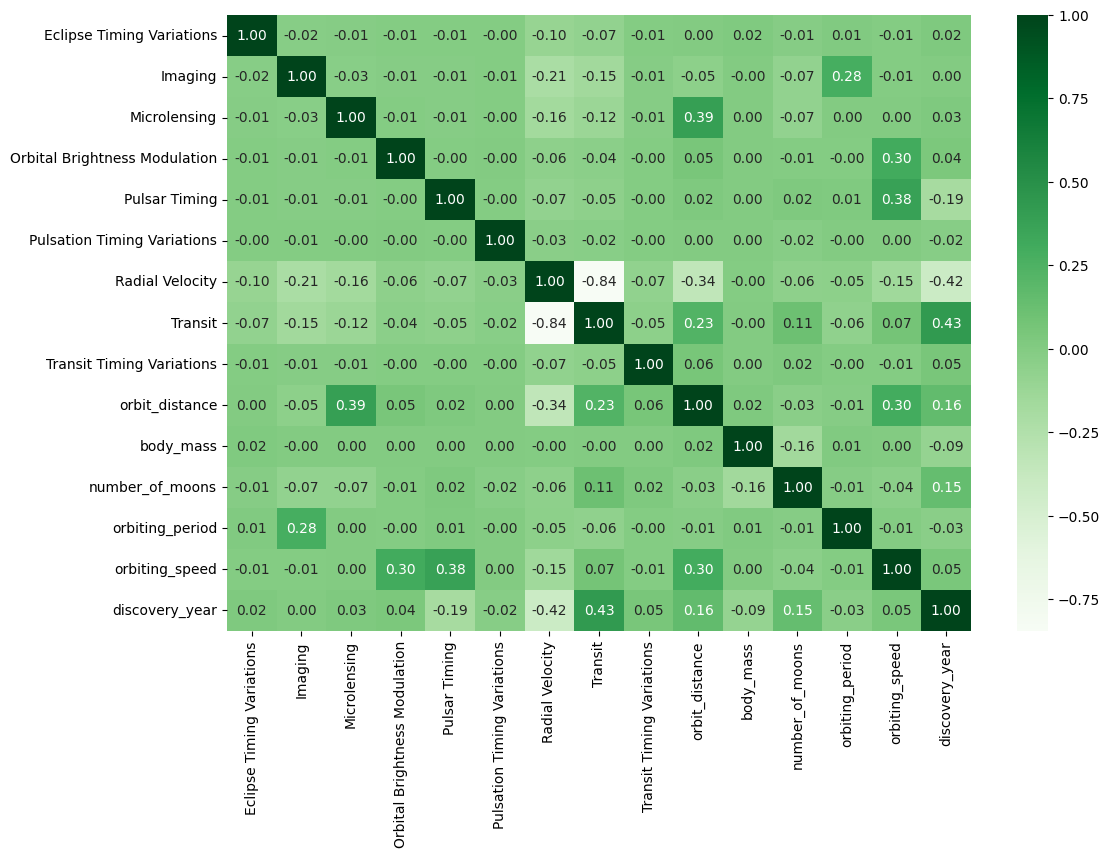

In [13]:
data_corr=data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data_corr,cmap="Greens",annot=True,fmt="0.2f")
plt.show()

In [14]:
high_corr = []
low_corr = []

for i in data.columns:
    if data_corr[i].min() < -0.50:
        low_corr.append(i)
    elif data_corr[i].max() > 0.75:
        high_corr.append(i)
print(data_corr[i].max(),data_corr[i].min())
print(f"high_corr:{high_corr} \n\n*_*\n\n low_corr:{low_corr}")


1.0 -0.4185447028403159
high_corr:['Eclipse Timing Variations', 'Imaging', 'Microlensing', 'Orbital Brightness Modulation', 'Pulsar Timing', 'Pulsation Timing Variations', 'Transit Timing Variations', 'orbit_distance', 'body_mass', 'number_of_moons', 'orbiting_period', 'orbiting_speed', 'discovery_year'] 

*_*

 low_corr:['Radial Velocity', 'Transit']


In [15]:
independent_data=data[["orbiting_period","body_mass","orbiting_speed"]]
dependent_data=pd.DataFrame(data["orbit_distance"])
print(independent_data.columns,"\n",dependent_data.columns)

Index(['orbiting_period', 'body_mass', 'orbiting_speed'], dtype='object') 
 Index(['orbit_distance'], dtype='object')


In [16]:
#boxplot
# for i in independent_data.columns:
#     plt.figure(figsize=(4, 2))
#     grid = sns.FacetGrid(data=independent_data, col=i)
#     grid.map(sns.boxplot, independent_data[i]) column
#     plt.show()

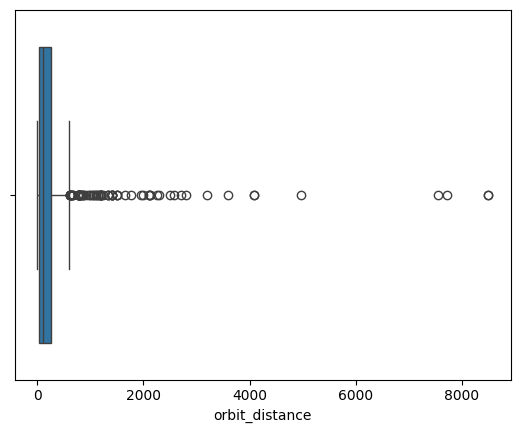

In [17]:
sns.boxplot(x="orbit_distance",data=dependent_data)
plt.show()
# plt.show()

In [18]:
print(independent_data.shape,dependent_data.shape)

(1035, 3) (1035, 1)


In [19]:
def outlier_detector(data,column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q1-Q3
    lower_bound=IQR-Q1*1.5
    upper_bound=IQR+Q1*1.5
    data=data[(data[column]<lower_bound)&(data[column]>upper_bound)]
    print((data[(data[column]<lower_bound)&(data[column]>upper_bound)]).count())
    return data

In [20]:
for i in independent_data.columns:
    outlier_detector(independent_data,i)

orbiting_period    0
body_mass          0
orbiting_speed     0
dtype: int64
orbiting_period    0
body_mass          0
orbiting_speed     0
dtype: int64
orbiting_period    0
body_mass          0
orbiting_speed     0
dtype: int64


In [21]:
for i in dependent_data.columns:
    outlier_detector(dependent_data,i)

orbit_distance    0
dtype: int64


In [22]:
print(independent_data.shape,dependent_data.shape)

(1035, 3) (1035, 1)


In [23]:
print(independent_data.head(),"\n     *_*")
print(dependent_data.head())

   orbiting_period  body_mass  orbiting_speed
0          269.300       7.10        0.287412
1          874.774       2.21        0.065103
2          763.000       2.60        0.026003
3          326.030      19.40        0.339294
4          516.220      10.50        0.231432 
     *_*
   orbit_distance
0           77.40
1           56.95
2           19.84
3          110.62
4          119.47


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
independent_data=scaler.fit_transform(independent_data)
independent_data=pd.DataFrame(independent_data)
dependent_data=scaler.fit_transform(dependent_data)
dependent_data=pd.DataFrame(dependent_data)


In [25]:
print(independent_data.head(),"\n     *_*")
print(dependent_data.head())

          0         1         2
0  0.000369  0.283897  0.000022
1  0.001198  0.088269  0.000005
2  0.001045  0.103871  0.000002
3  0.000446  0.775968  0.000026
4  0.000707  0.419916  0.000017 
     *_*
          0
0  0.008948
1  0.006542
2  0.002176
3  0.012857
4  0.013899


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(independent_data,dependent_data,random_state=27,test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(828, 3) (207, 3) (828, 1) (207, 1)


In [28]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn .linear_model import LinearRegression,QuantileRegressor,GammaRegressor,HuberRegressor,PoissonRegressor,TweedieRegressor,TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor

In [29]:
def accuracy(y_test,y_pred):
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mse)
    print(f"mean_absolute_error:{mae}")
    print(f"mean_squared_error:{mse}")
    print(f"r2_score:{r2},\n     *_*")

In [30]:
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]#,HuberRegressor(),PoissonRegressor(),TweedieRegressor()
def predict(modelx,X_train, y_train):
    model=modelx
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    accuracy(y_test,y_pred)
    return     accuracy(y_test,y_pred)


In [31]:
from sklearn.model_selection import cross_val_score
modelscore=cross_val_score(RandomForestRegressor(),X_train, y_train,cv=3)
print(modelscore.mean())

modelscorelr=cross_val_score(LinearRegression(),X_train, y_train,cv=3)
print(modelscorelr.mean())

modelscoredt=cross_val_score(DecisionTreeRegressor(),X_train, y_train,cv=3)
print(modelscoredt.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


0.26655696583906613
-0.1661569810097673
0.04299598771101032


In [32]:
from sklearn.model_selection import cross_val_score#cv=k_folds
RFscore=cross_val_score(RandomForestRegressor(),X_train, y_train,cv=3)
print(f"RandomForestRegressor Average:{RFscore.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


RandomForestRegressor Average:0.24516902989668596


In [33]:
import random

In [34]:
def compareplot(pred,model):
    r = random.uniform(0, 1)
    g = random.uniform(0, 1)
    b = random.uniform(0, 1)
    color = (r, g, b)
    model=str(model)
    plt.plot(pred, pred, color=color, label=model)
    plt.legend()
    plt.show()

In [35]:
for i in models:
    print(i)
    predict(i, X_train, y_train)
    pred = predict(i, X_train, y_train)
    if pred is not None:
            compareplot(pred, i.__class__.__name__)

LinearRegression()
mean_absolute_error:0.025731419589574273
mean_squared_error:0.002715948328252227
r2_score:0.1528565080330394,
     *_*
mean_absolute_error:0.025731419589574273
mean_squared_error:0.002715948328252227
r2_score:0.1528565080330394,
     *_*
mean_absolute_error:0.025731419589574273
mean_squared_error:0.002715948328252227
r2_score:0.1528565080330394,
     *_*
mean_absolute_error:0.025731419589574273
mean_squared_error:0.002715948328252227
r2_score:0.1528565080330394,
     *_*
DecisionTreeRegressor()
mean_absolute_error:0.011875324793288865
mean_squared_error:0.001550822898127694
r2_score:0.5162759498492901,
     *_*
mean_absolute_error:0.011875324793288865
mean_squared_error:0.001550822898127694
r2_score:0.5162759498492901,
     *_*
mean_absolute_error:0.01188545427932744
mean_squared_error:0.001567950700205915
r2_score:0.5109335411181195,
     *_*
mean_absolute_error:0.01188545427932744
mean_squared_error:0.001567950700205915
r2_score:0.5109335411181195,
     *_*
RandomF

<ipython-input-30-8f84cb103435>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


mean_absolute_error:0.01081476237662225
mean_squared_error:0.001626255121796798
r2_score:0.4927475503207911,
     *_*
mean_absolute_error:0.01081476237662225
mean_squared_error:0.001626255121796798
r2_score:0.4927475503207911,
     *_*


<ipython-input-30-8f84cb103435>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


mean_absolute_error:0.011539145253370027
mean_squared_error:0.002028646916444935
r2_score:0.36723574050059427,
     *_*
mean_absolute_error:0.011539145253370027
mean_squared_error:0.002028646916444935
r2_score:0.36723574050059427,
     *_*


In [36]:
X,y=independent_data,dependent_data

X = np.array(X)
X = np.nan_to_num(X, nan=np.nanmean(X))

y = np.array(y)
y = np.nan_to_num(y, nan=np.nanmean(y))


In [39]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.8 MB/s eta 0:00:00


In [41]:
import optuna
def objective(trial):
    params = {'n_estimators': trial.suggest_int('n_estimators', 100, 1000),#Here use your own params(useful),not entire param list
              'max_depth': trial.suggest_int('max_depth', 10, 50),
              'min_samples_split': trial.suggest_int('min_samples_split', 2, 32),
              'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 32)}

    model = RandomForestRegressor(**params)
    return -cross_val_score(model, X, y, n_jobs=-1, cv=10).mean()#here tweak the crosss validation cv=xyz,your wish

study = optuna.create_study(study_name="hyper param selection .-.",direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(objective, n_trials=25)#Here the tweak to chek more times to get more good results

best_params = study.best_params
best_score = study.best_value
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {-best_score:.3f}")


[I 2024-07-17 11:21:07,437] A new study created in memory with name: hyper param selection .-.
[I 2024-07-17 11:21:24,398] Trial 0 finished with value: 1.5401661176169041 and parameters: {'n_estimators': 437, 'max_depth': 48, 'min_samples_split': 24, 'min_samples_leaf': 20}. Best is trial 0 with value: 1.5401661176169041.
[I 2024-07-17 11:21:30,560] Trial 1 finished with value: 1.5069582051417627 and parameters: {'n_estimators': 240, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 28}. Best is trial 0 with value: 1.5401661176169041.
[I 2024-07-17 11:21:39,958] Trial 2 finished with value: 1.473551185298537 and parameters: {'n_estimators': 641, 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 32}. Best is trial 0 with value: 1.5401661176169041.
[I 2024-07-17 11:21:58,465] Trial 3 finished with value: 1.9908688482304684 and parameters: {'n_estimators': 850, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 3 with value: 1.990868848230

Best Hyperparameters: {'n_estimators': 794, 'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 4}
Best Accuracy: -2.156


In [ ]:
# Perform the Optuna optimization study as shown in the previous examples
# Visualize optimization history
optuna.visualization.plot_optimization_history(study)
plt.show()
# Visualize parameter importance
optuna.visualization.plot_param_importances(study)
plt.show()

In [ ]:
modex.get_params()

In [ ]:
X,y=independent_data,dependent_data

X = np.array(X)
X = np.nan_to_num(X, nan=np.nanmean(X))

y = np.array(y)
y = np.nan_to_num(y, nan=np.nanmean(y))


In [ ]:
modex=RandomForestRegressor()
modex.fit(X,y)
prec=modex.predict(X)
modex.score(X,y)

In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

DTC = DecisionTreeRegressor().fit(X_train, y_train) # DTC = DecisionTreeClassifier().fit(x_train, y_train)   -> both are same
DTCpred=DTC.predict(X_train)

DTC.score(X_train,y_train)